<a href="https://colab.research.google.com/github/doritos0812/Software_LAB_Class/blob/main/%EA%B9%80%ED%98%95%EB%AF%BC_Ex_Firing_table_rev_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Firing table

__<div style="text-align: right"> EE370: Software lab, Kyung Hee University. </div>__
_<div style="text-align: right"> Jong-Han Kim (jonghank@khu.ac.kr) </div>_

This example involves the kinematics of a projectile, whose dynamical relations can be described by the following differential equations

<br>

\begin{align*}
  m\dot{V} &=  -0.5\rho V^2 S C_d - mg\sin\gamma \\
  V\dot{\gamma} &= -g\cos\gamma \\
  \dot{R} &= V\cos\gamma \\
  \dot{h} &= V\sin\gamma
\end{align*}

<br>

where $V$, and $\gamma$ represents the speed and the flight path angle of the projectile, where a positive $\gamma$ implies the projectile is going up, and $\gamma=+\pi/2$ implies vertical ascend.

<center>
<img src="https://jonghank.github.io/ee370/files/projectile.png" width="600">
</center>
Throughout this problem, you can assume that the gravitational acceleration is constant, $g=9.8m/s^2$, and the air density is well approximated by the following formula.

<br>

$$
  \rho(h) = 1.225 \left(1-2.256\times 10^{-5}h \right)^{5.256}
$$

<br>

Suppose a projectile with the following specifications is launched.

- $m$: mass (=$40kg$)
- $d$: diameter (=$16cm$)
- $S$: cross-section area (=$\pi d^2/4$)
- $C_d$: drag coefficient (=$0.2$)
- $V(0)$: initial velocity (=$1000m/s$)





**(Problem 1)** For various initial launch angles, $\gamma(0) = 20,25,\dots, 65, 70$ degrees, plot the vertical trajectory (on $R-h$ plane) and the time history of the projectile's speed.

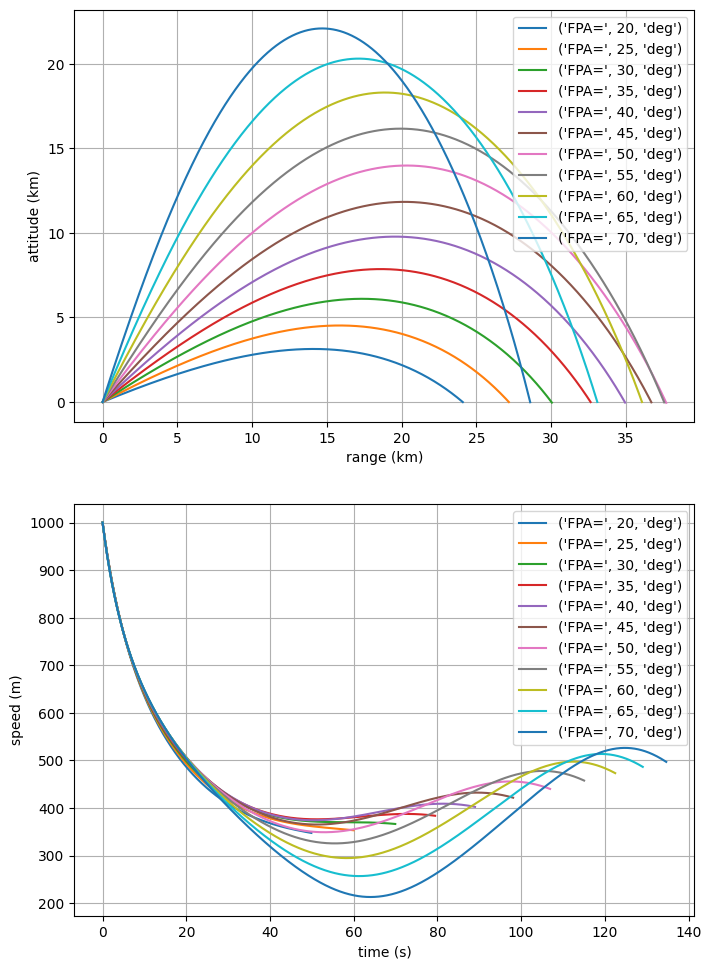

In [ ]:
# your code here
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as spi

m=40
d=0.16
Cd=0.2
S=np.pi*d**2/4
# function that returns dy/dt=[hdot, vdot]
def model(z,t): 
  h,v,w,R=z
  rho = 1.225*(1-2.256e-5*h)**5.256 # air density
  vdot=(-0.5*rho*v*v*S*Cd-m*9.8*np.sin(w))/m
  wdot = (-9.8*np.cos(w))/v                      
  Rdot = v*np.cos(w)   
  hdot = v*np.sin(w)                   
  return np.array([hdot, vdot,wdot,Rdot])


# time points
t = np.linspace(0,140,1000)

plt.figure(figsize=(8,12), dpi=100)
plt.subplot(211)
for i in range(11):
  w_ang=np.pi*(20+5*i)/180
  states=[[0,0,0,0],[0,1000,w_ang,0]]
  states_arr=[[0,1000,w_ang,0]]
  for j in range(999):
    ic=states[1]
    states=spi.odeint(model,ic,t[0:2])
    states_arr.append(states[1])
    if (states[1][0]<0):
      break
  x=np.array(states_arr)
  plt.plot(x[:,3]/1000, x[:,0]/1000,label=('FPA=',i*5+20,'deg'))
plt.ylabel('attitude (km)')
plt.xlabel('range (km)')
plt.legend()
plt.grid()

plt.subplot(212)
for i in range(11):
  w_ang=np.pi*(20+5*i)/180
  states=[[0,0,0,0],[0,1000,w_ang,0]]
  states_arr=[[0,1000,w_ang,0]]
  for j in range(999):
    ic=states[1]
    states=spi.odeint(model,ic,t[0:2])
    states_arr.append(states[1])
    
    if (states[1][0]<0):
      t_arr=t[:j+2]
      break
  x=np.array(states_arr)
  plt.plot(t_arr, x[:,1],label=('FPA=',i*5+20,'deg'))
plt.ylabel('speed (m)')
plt.xlabel('time (s)')
plt.legend()
plt.grid()

plt.show()


**(Problem 2)** With which initial launch angle, $\gamma(0)$, should the projectile be launched, so that it reaches its maximum range? Answers upto the two most significant digits would suffice. 

The Maximum Range is  37.77597358654456 km when the Angle is  52


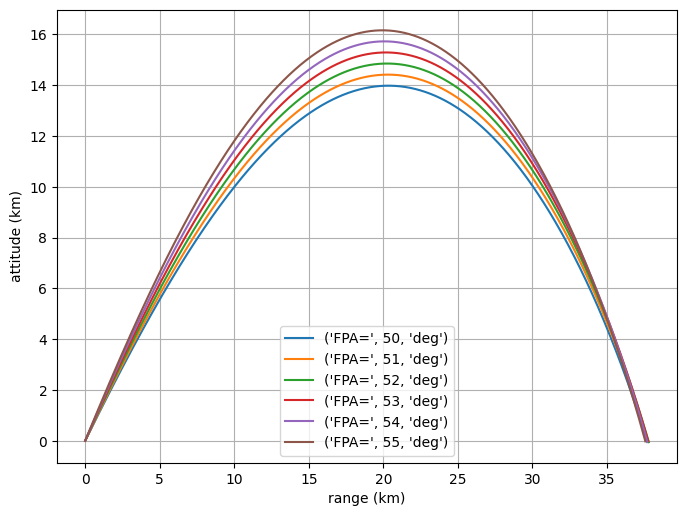

In [ ]:
# your code here
plt.figure(figsize=(8,6), dpi=100)
best_range=0
best_angle=0
for i in range(6):
  w_ang=np.pi*(50+i)/180
  states=[[0,0,0,0],[0,1000,w_ang,0]]
  states_arr=[[0,1000,w_ang,0]]
  for j in range(999):
    ic=states[1]
    states=spi.odeint(model,ic,t[0:2])
    states_arr.append(states[1])
    if (states[1][0]<0):
      if states[0][3]>best_range:
        best_range=states[0][3]
        best_angle=50+i
      break
  x=np.array(states_arr)
  plt.plot(x[:,3]/1000, x[:,0]/1000,label=('FPA=',i+50,'deg'))
plt.ylabel('attitude (km)')
plt.xlabel('range (km)')
plt.legend()
plt.grid()
print("The Maximum Range is ",best_range/1000,"km when the Angle is ",best_angle)

**(Problem 3)** Suppose you use the projectile for a parcel delivery service for your customer. Then you will probably need to make at least two modifications to your system, since the initial and the final speed of the projectile are too much high. So you decided to use a small engine, that will slowly accelerate the projectile in the beginning, and a small parachute that decelerates the projectile when it reaches the target. Your parachute deploys when $h\le 1000m$ and $\gamma\le 0$

So your model now looks like,

\begin{align*}
  m\dot{V} &= -0.5\rho V^2 S C_d - mg\sin\gamma + T \\
  V\dot{\gamma} &= -g\cos\gamma \\
  \dot{R} &= V\cos\gamma \\
  \dot{h} &= V\sin\gamma
\end{align*}

with 

$$
T =
\begin{cases}
4000N & \text{if } t \le 10  s\\
0   & \text{otherwise}
\end{cases}
$$
and
$$
C_{d}=
\begin{cases}
10    & \text{if }  \gamma\le 0 \text{ and } h\le 1000m \\
0.2   & \text{otherwise}
\end{cases}
$$

Find a sample trajectory when 

- $m$: mass (=$40kg$)
- $d$: diameter (=$16cm$)
- $S$: cross-section area (=$\pi d^2/4$)
- $V(0)$: initial velocity (=$1$)
- $\gamma(0)$: launch angle (=$50\text{deg}$)



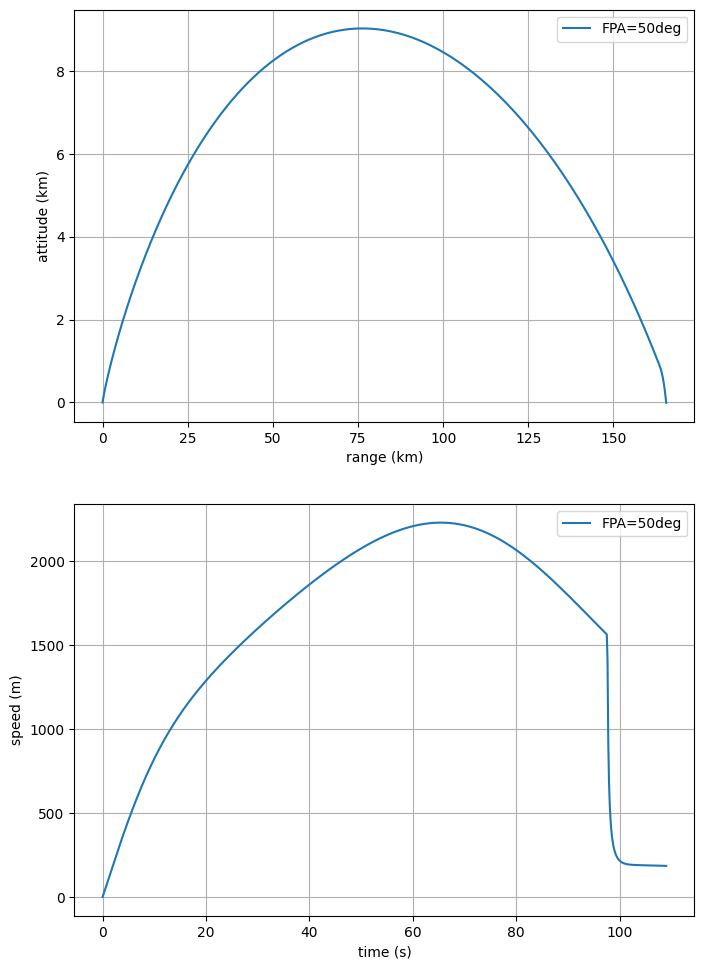

In [ ]:
# your code here
m=40
d=0.16
w=np.pi*(50/180)
S=np.pi*d**2/4
# function that returns dy/dt=[hdot, vdot]
def model(z,t): 
  h,v,w,R=z
  if t<10:
    T=4000
  else:
    T=0
  if w<=0 and h<=1000:
    Cd=10
  else:
    Cd=0.2
  rho = 1.225*(1-2.256e-5*h)**5.256 # air density
  vdot=(-0.5*rho*v*v*S*Cd-m*9.8*np.sin(w)+T)/m
  wdot = (-9.8*np.cos(w))/v                      
  Rdot = v*np.cos(w)   
  hdot = v*np.sin(w)                   
  return np.array([hdot, vdot,wdot,Rdot])


# time points
t = np.linspace(0,140,1000)

plt.figure(figsize=(8,12), dpi=100)
plt.subplot(211)
states=[[0,0,0,0],[0,1,w,0]]
states_arr=[[0,1,w,0]]
for j in range(999):
  ic=states[1]
  states=spi.odeint(model,ic,t[0:2])
  states_arr.append(states[1])
  if (states[1][0]<0):
    t_arr=t[:j+2]
    break
x=np.array(states_arr)
plt.plot(x[:,3]/1000, x[:,0]/1000,label=('FPA=50deg'))
plt.ylabel('attitude (km)')
plt.xlabel('range (km)')
plt.legend()
plt.grid()
plt.subplot(212)
plt.plot(t_arr, x[:,1],label=('FPA=50deg'))
plt.ylabel('speed (m)')
plt.xlabel('time (s)')
plt.legend()
plt.grid()

plt.show()

